# Class 0

Topics:
- introduction to python using imageio, numpy and matplotlib.pyplot
- open an image
- useful numpy functions

start with import of packages / libraries / functions, we import only few libraries (so far no scipy, opencv, etc) 
- imageio to open and save images
- numpy to make the computations in vector / matrix format
- matplotlib.pyplot to show images

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

### open image from repository

C:\Users\AGUSTIN\AppData\Local\Temp\ipykernel_6500\510611004.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('imageio:chelsea.png')/255.


Imageio: 'chelsea.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/chelsea.png (216 kB)
Downloading: 8192/221294 bytes (3.7221294/221294 bytes (100.0%)
  Done
File saved as C:\Users\AGUSTIN\AppData\Local\imageio\images\chelsea.png.
shape is 2D (y,x) + 3 color channels: (300, 451, 3)


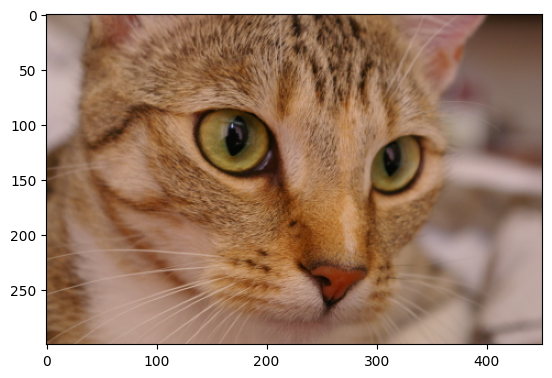

In [3]:
im = imageio.imread('imageio:chelsea.png')/255.
print('shape is 2D (y,x) + 3 color channels: ' +str(im.shape))
plt.imshow(im)
plt.show()

### conversion to gray scale
- creating a (y,x) image
    - imshow depends on "colormap"
- creating a (y,x,3) image with every channel containing the same information

(300, 451)


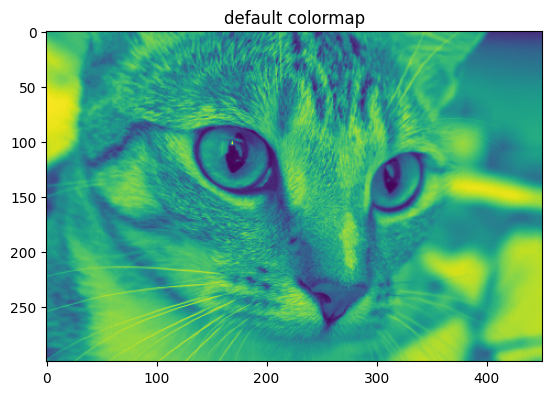

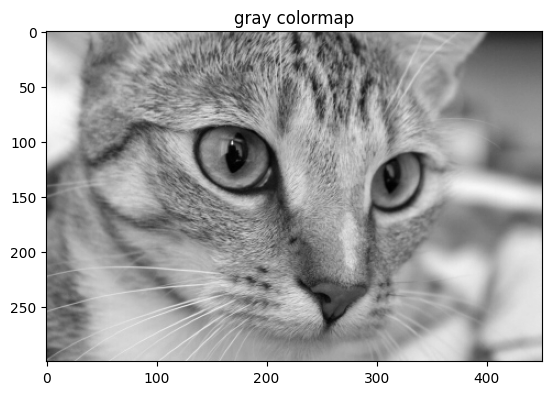

(300, 451, 3)


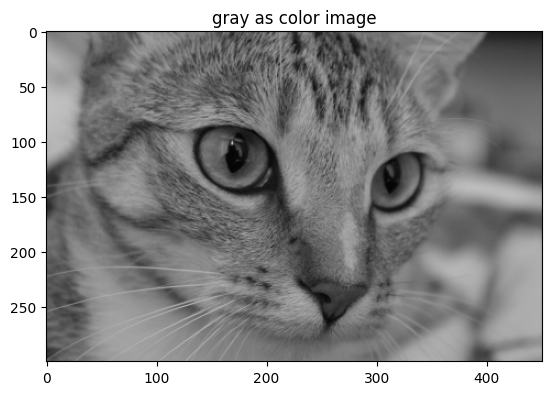

In [4]:
im_gray = im.mean(axis=2)
print(im_gray.shape)
plt.imshow(im_gray)
plt.title('default colormap')
plt.show()
plt.imshow(im_gray, 'gray')
plt.title('gray colormap')
plt.show()

im_gray3 = im_gray.reshape((*im_gray.shape, 1)).repeat(3,2)
print(im_gray3.shape)
plt.imshow(im_gray3)
plt.title('gray as color image')
plt.show()

### image magic: swap channels (explicitely)

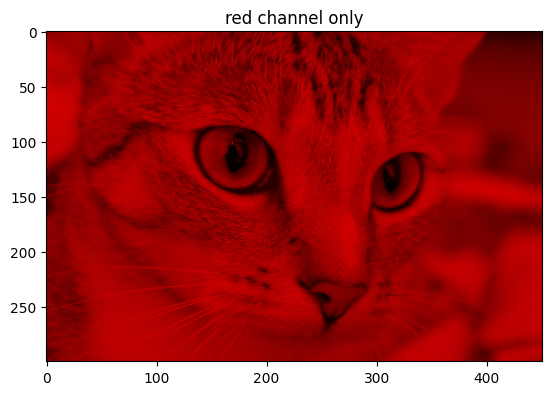

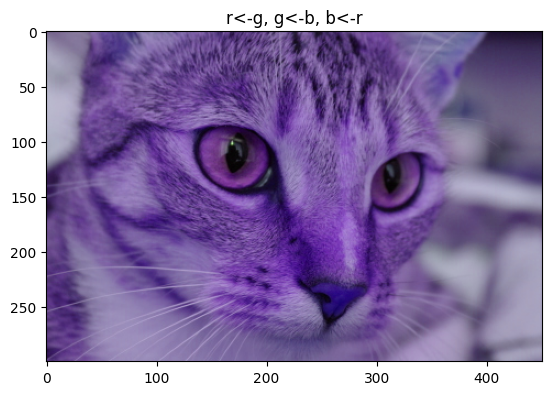

In [5]:
im_red = np.zeros_like(im)
im_red[:,:,0] = im[:,:,0]
plt.imshow(im_red)
plt.title('red channel only')
plt.show()

im2 = np.zeros_like(im)
for i in range(3):
    im2[:,:,i] = im[:,:,(i+1)%3]
plt.imshow(im2)
plt.title('r<-g, g<-b, b<-r')
plt.show()

### image magic: swap channels with matrix multiplication

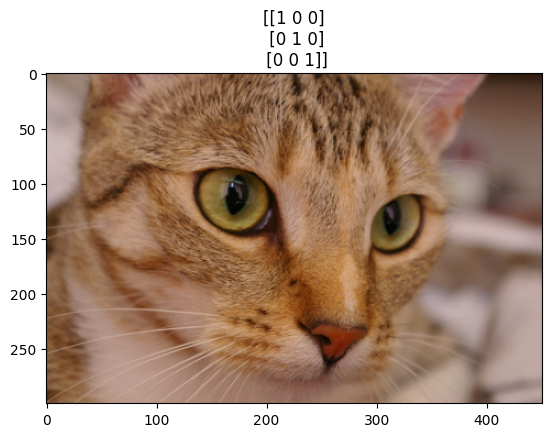

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.054901960784313725..6.0549019607843135].


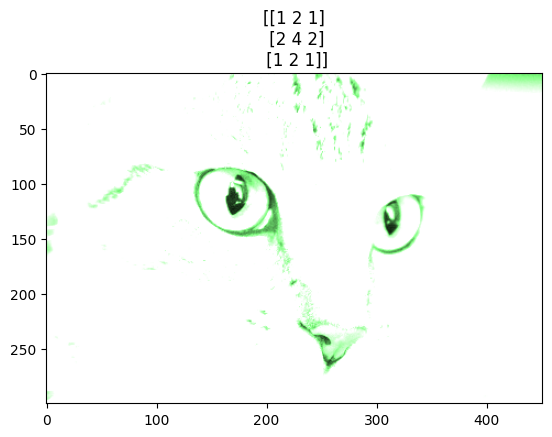

In [27]:
mat = np.array([1, 0, 0, 0, 1, 0, 0, 0, 1]).reshape((3,3))

img4 = np.matmul(im.reshape((-1,3)),mat).reshape(im.shape)
plt.imshow(img4,'gray')
plt.title(str(mat))
plt.show()

mat = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1]).reshape((3,3))
img2 = np.matmul(im.reshape((-1,3)),mat).reshape(im.shape)
plt.imshow(img2,'gray')

plt.title(str(mat))
plt.show()


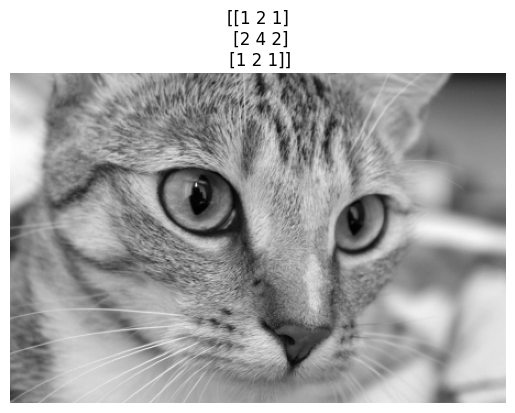

In [25]:
# Matriz tipo Pascal 3x3
mat = np.array([1, 2, 1,
                2, 4, 2,
                1, 2, 1]).reshape((3,3))

# Transformación de la imagen
im_trans = np.matmul(im.reshape((-1,3)), mat).reshape(im.shape)

# Convertir a gris promediando canales
im_gray = im_trans.mean(axis=2)

plt.imshow(im_gray, cmap='gray')
plt.title(str(mat))
plt.axis("off")
plt.show()

In [ ]:
mat = np.array([3,1,1, 0,1,1, 0,1,1]).reshape((3,3)) / 3.
plt.imshow(np.matmul(im.reshape((-1,3)),mat).reshape(im.shape))
plt.title(str(mat))
plt.show()

C:\Users\AGUSTIN\AppData\Local\Temp\ipykernel_6500\4008233005.py:1: RuntimeWarning: divide by zero encountered in divide
  mat = np.array([3,1,1, 0,1,1, 0,1,1]).reshape((3,3)) / 0,2.
C:\Users\AGUSTIN\AppData\Local\Temp\ipykernel_6500\4008233005.py:1: RuntimeWarning: invalid value encountered in divide
  mat = np.array([3,1,1, 0,1,1, 0,1,1]).reshape((3,3)) / 0,2.


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

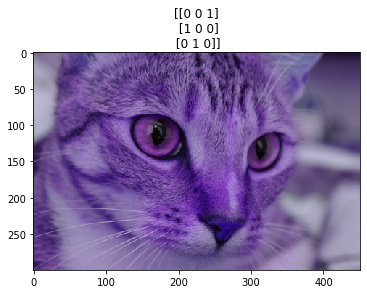

In [7]:
mat = np.array([0,0,1, 1,0,0, 0,1,0]).reshape((3,3))
plt.imshow(np.matmul(im.reshape((-1,3)),mat).reshape(im.shape))
plt.title(str(mat))
plt.show()

- inverse matrix

[[0.09340289 0.00343749 0.77563651]
 [0.53783387 0.22753724 0.44330627]
 [0.61650036 0.21114374 0.09120164]]
[[  2.72275489  -6.10922067   6.53922183]
 [ -8.38124313  17.55361831 -14.04394656]
 [  0.99853124   0.65788346  -0.72521889]]


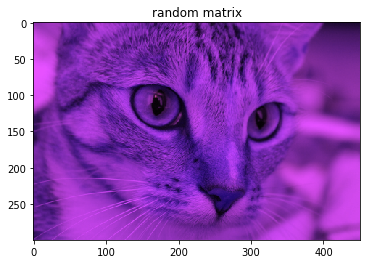

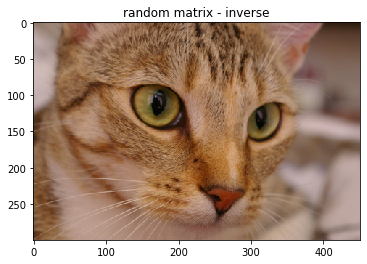

In [8]:
mat = np.abs(np.random.randn(3,3))
mat /= (mat.sum() / 3)
print(mat)

mat_inv = np.linalg.inv(mat)
print(mat_inv)
im_transformed = np.matmul(im.reshape((-1,3)),mat).reshape(im.shape)
plt.title('random matrix')
plt.imshow(np.clip(im_transformed,0,1))
plt.show()

im_reconstructed = np.matmul(im_transformed.reshape((-1,3)),mat_inv).reshape(im.shape)
plt.title('random matrix - inverse')
plt.imshow(np.clip(im_reconstructed, 0, 1))
plt.show()

- How do we check if two images are identical?

In [9]:
# this is not working here... why?
print('exactly equal? ' + str(np.max(np.abs(im-im_reconstructed))==0))

#use rmse instead
epsilon = 10**(-12)
print('difference smaller than '+str(epsilon)+'? ' + str(np.sqrt(np.mean((im-im_reconstructed)**2)) < epsilon))

exactly equal? False
difference smaller than 1e-12? True


# Class 1: RGB2YIQ and YIQ2RGB
- convert image to yiq
- multiply Y-channel, multiply IQ-channel
- retransform to rgb
- do boundary check to keep in permitted range